Assignment 4
Data Visualization I
Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [32]:
df["age"] = df["age"].fillna(df["age"].mean())

In [33]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
df["deck"] = df["deck"].ffill()

In [35]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           1
embark_town    2
alive          0
alone          0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [38]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

<Axes: xlabel='age', ylabel='count'>

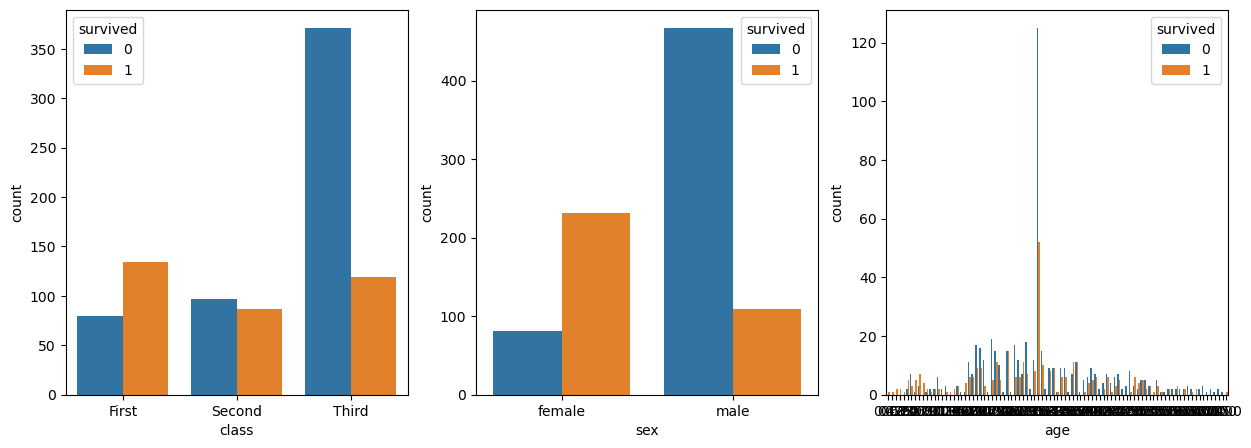

In [39]:
fig , axes = plt.subplots(1 , 3 ,figsize = (15 , 5))
sns.countplot(data = df , x = "class" , hue = "survived" , ax = axes[0])
sns.countplot(data = df , x = "sex" , hue = "survived" , ax = axes[1])
sns.countplot(data = df , x = "age" , hue = "survived" , ax = axes[2])

<Axes: ylabel='age'>

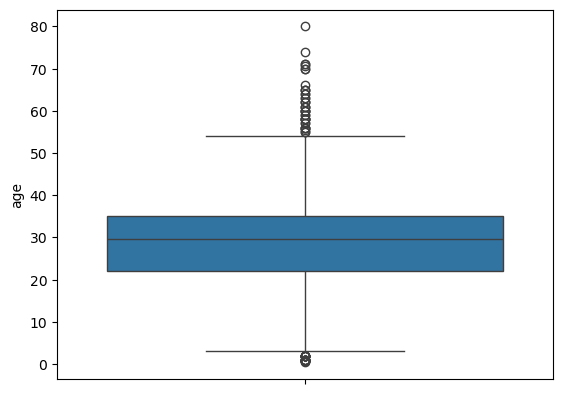

In [40]:
sns.boxplot(data = df , y = "age")


<Axes: ylabel='fare'>

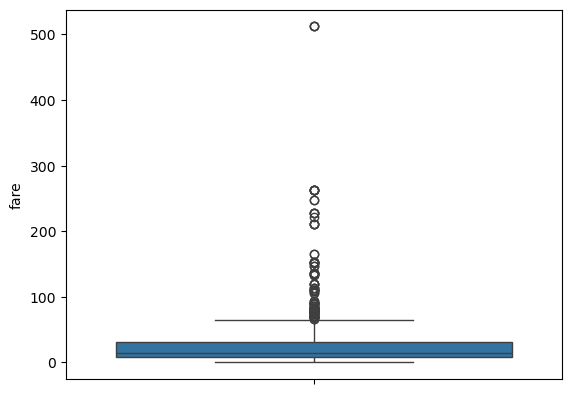

In [41]:
sns.boxplot(data = df , y = "fare")


In [44]:
def IQR_outlier(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr  # Standard multiplier
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df = IQR_outlier(df, "age")
df = IQR_outlier(df, "fare")

<Axes: ylabel='fare'>

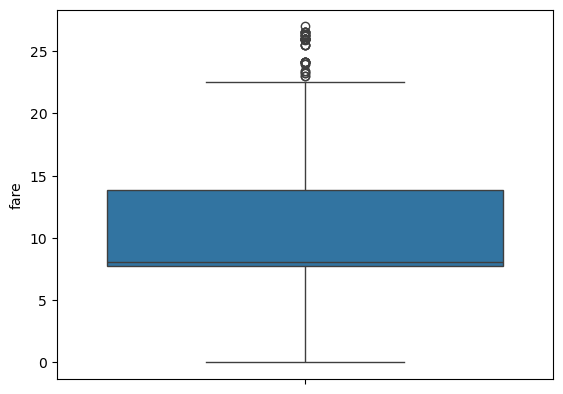

In [45]:
sns.boxplot(data = df , y = "fare")

<Axes: xlabel='class', ylabel='count'>

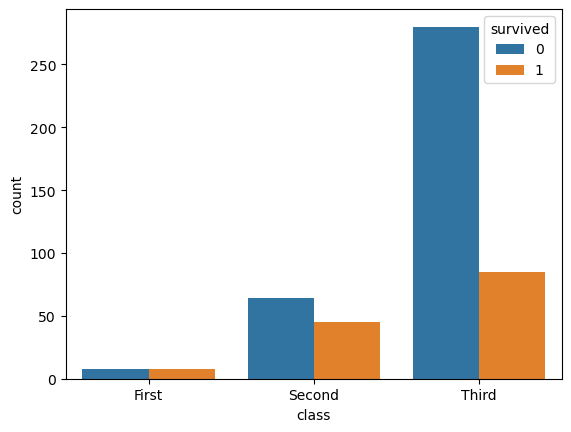

In [46]:
sns.countplot(data=df, x="class", hue="survived")

<Axes: xlabel='sex', ylabel='count'>

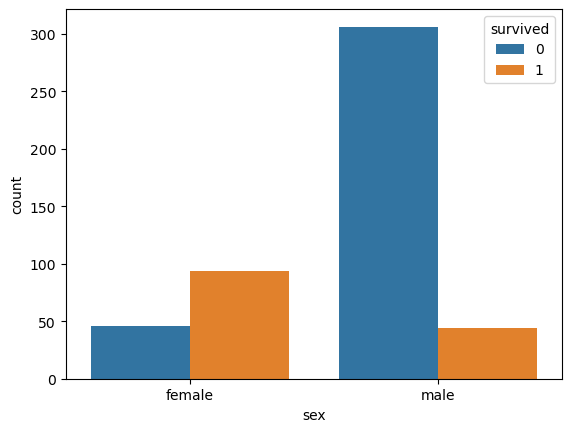

In [47]:
sns.countplot(data=df, x="sex", hue="survived")

<Axes: xlabel='who', ylabel='count'>

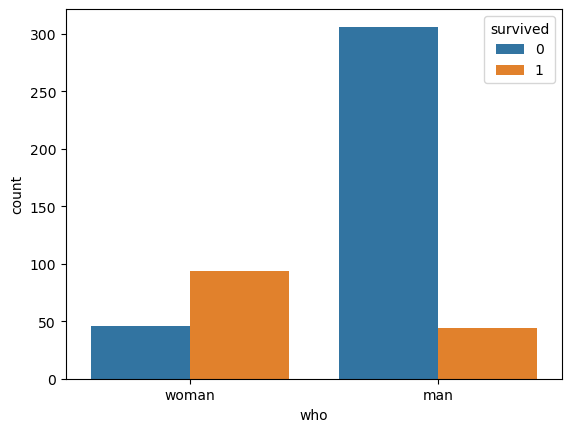

In [48]:
sns.countplot(data=df, x="who", hue="survived")

<Axes: xlabel='fare', ylabel='Count'>

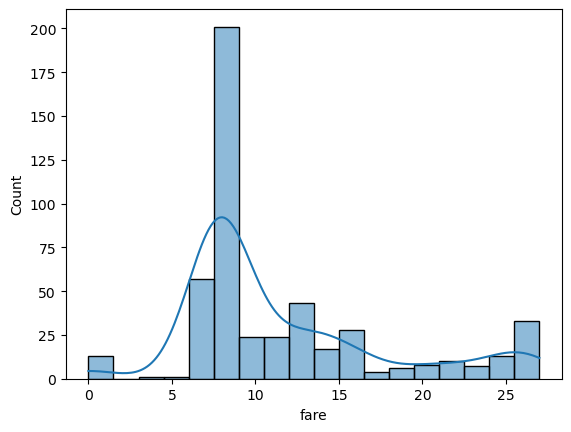

In [50]:
sns.histplot(data = df , x = "fare" , kde= True)